In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob

In [2]:
df = pd.read_csv('dataset.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Post ID              2000 non-null   object
 1   Post Content         2000 non-null   object
 2   Sentiment Label      2000 non-null   object
 3   Number of Likes      2000 non-null   int64 
 4   Number of Shares     2000 non-null   int64 
 5   Number of Comments   2000 non-null   int64 
 6   User Follower Count  2000 non-null   int64 
 7   Post Date and Time   2000 non-null   object
 8   Post Type            2000 non-null   object
 9   Language             2000 non-null   object
dtypes: int64(4), object(6)
memory usage: 156.4+ KB
None


In [3]:
print(df.head())

                                Post ID  \
0  aa391375-7355-44b7-bcbf-97fb4e5a2ba3   
1  1c9ec98d-437a-48d9-9cba-bd5ad853c59a   
2  170e5b5b-1d9a-4d02-a957-93c4dbb18908   
3  aec53496-60ee-4a06-8821-093a04dc8770   
4  4eacddb7-990d-4056-8784-7e1d5c4d1404   

                                        Post Content Sentiment Label  \
0  Word who nor center everything better politica...         Neutral   
1  Begin administration population good president...        Positive   
2  Thousand total sign. Agree product relationshi...        Positive   
3  Individual from news third. Oil forget them di...         Neutral   
4  Time adult letter see reduce. Attention sudden...        Negative   

   Number of Likes  Number of Shares  Number of Comments  User Follower Count  \
0              157               243                  64                 4921   
1              166                49                 121                  612   
2              185               224                 179         

In [4]:
# Predefined list of stopwords
custom_stopwords = set([
 "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you","your", "yours", "yourself","yourselves", "he", "him", "his", "himself", "she", "her", "hers",
"herself", "it", "its", "itself","they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been",
"being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and","but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about",
"against", "between", "into", "through", "during", "before", "after", "above", "below", "to","from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then",
 "once","here", "there", "when", "where","why", "how", "all", "any", "both", "each", "few", "more", "most","other", "some", "such", "no",
 "nor", "not", "only", "own", "same", "so", "than", "too", "very","s", "t", "can", "will", "just", "don", "should", "now"])

In [5]:
def preprocess_text(text):
    """Cleans and preprocesses text data."""
    text = text.lower() # Convert to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE) # Remove URLs
    text = re.sub(r"[^\w\s]", "", text) # Remove punctuation
    text = re.sub(r"\d+", "", text) # Remove numbers
    text = " ".join([word for word in text.split() if word not in custom_stopwords]) # Remove stopwords

    return text

In [6]:
# Apply preprocessing to "Post Content"
df["Cleaned Post Content"] = df["Post Content"].astype(str).apply(preprocess_text)

In [7]:
# Generate Word Cloud
text_corpus = " ".join(df["Cleaned Post Content"])
wordcloud = WordCloud(width=800, height=400,
background_color="white").generate(text_corpus)

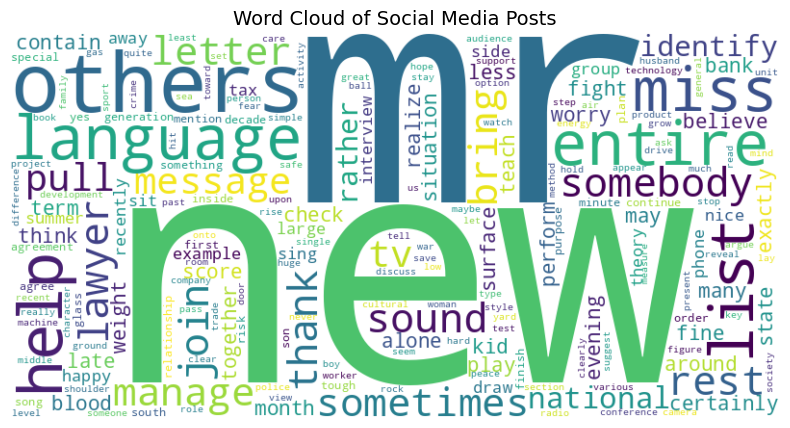

In [8]:
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.title("Word Cloud of Social Media Posts", fontsize=14)
plt.show()

In [9]:
# Function for sentiment analysis
def get_sentiment(text):
    """Classifies text sentiment as Positive, Neutral, or Negative."""
    sentiment_score = TextBlob(text).sentiment.polarity
    if sentiment_score > 0:
        return "Positive"
    elif sentiment_score < 0:
        return "Negative"
    else:
        return "Neutral"

In [10]:
# Apply sentiment analysis
df["Sentiment"] = df["Cleaned Post Content"].apply(get_sentiment)

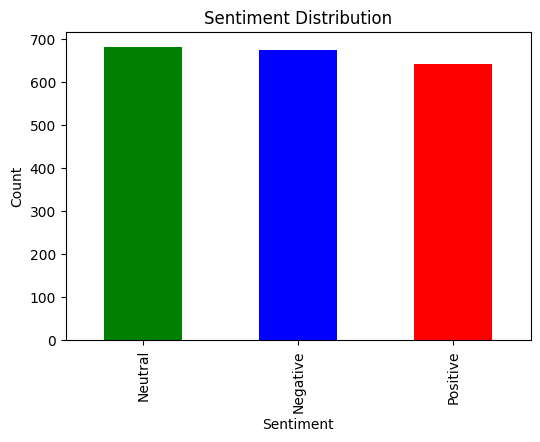

In [11]:
# Plot sentiment distribution
plt.figure(figsize=(6, 4))
df["Sentiment Label"].value_counts().plot(kind="bar", color=["green", "blue","red"])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")

plt.ylabel("Count")
plt.show()